# Data Exploration Walkthrough
Kyle Kulas


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df_train = pd.read_csv('train.csv')
df_train.shape


(1460, 81)

In [109]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [110]:
#check for dupes for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)


0


In [111]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\Kyle\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

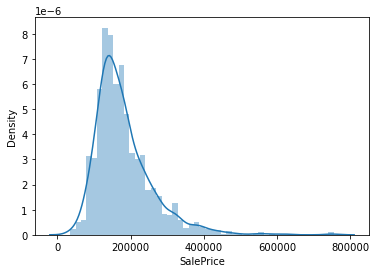

In [112]:
sns.distplot(df_train['SalePrice'])

In [113]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

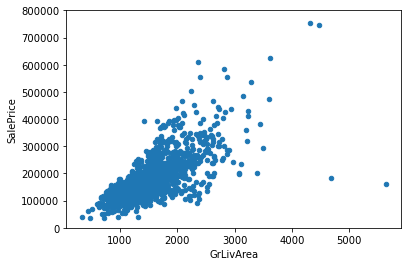

In [114]:
#scatter plot grlivarea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

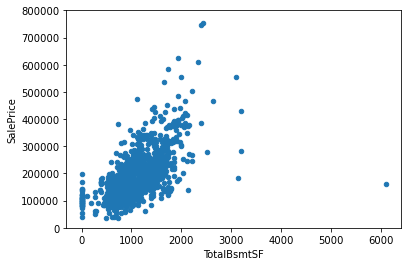

In [115]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

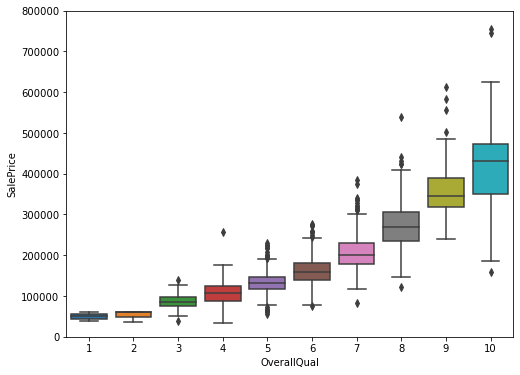

In [116]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 24.5, 0.0, 800000.0)

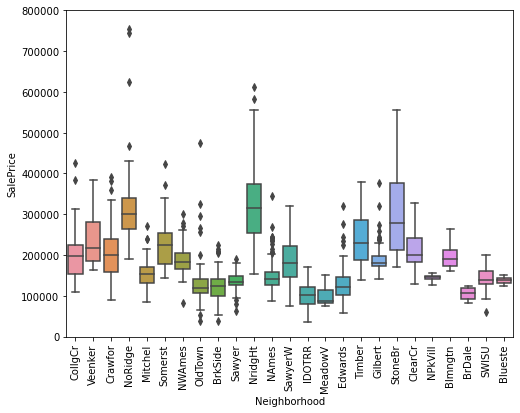

In [117]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=800000)


(-0.5, 111.5, 0.0, 800000.0)

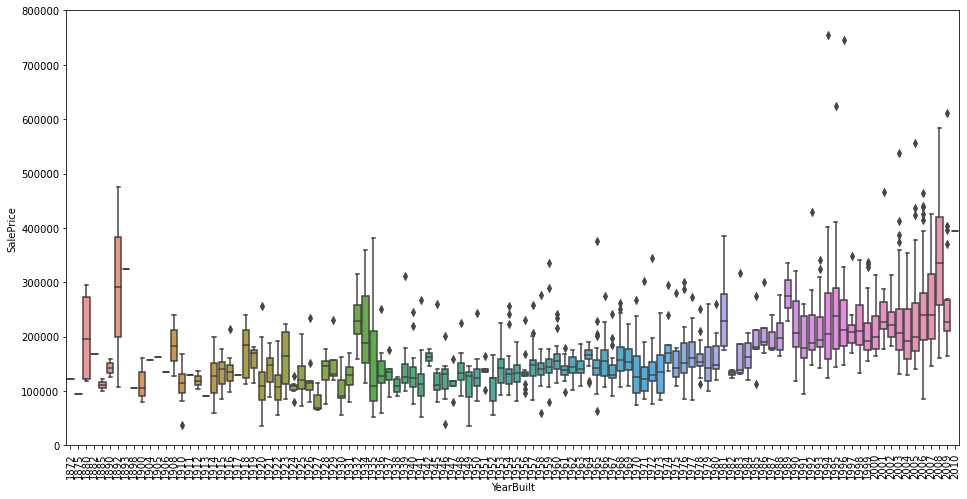

In [118]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=800000)


<AxesSubplot:>

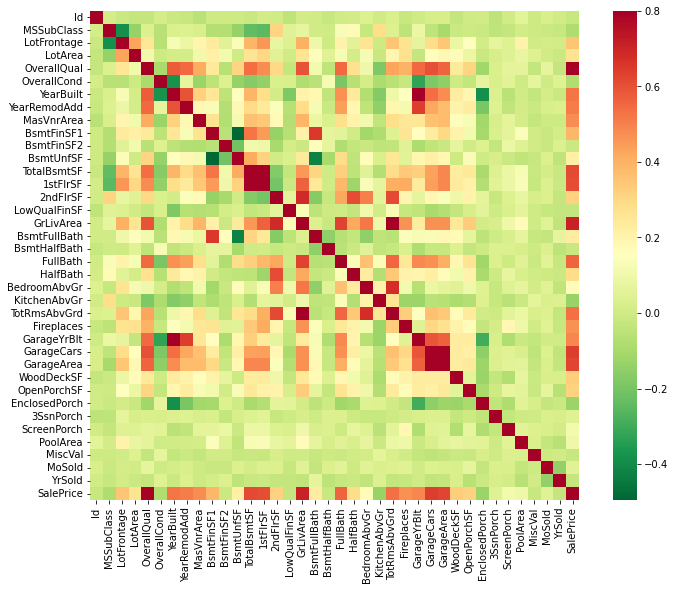

In [119]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

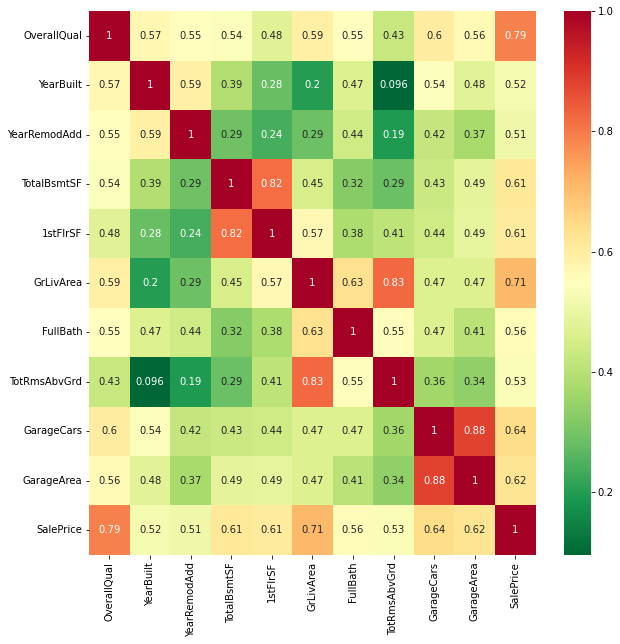

In [120]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

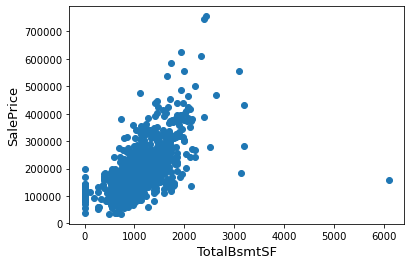

In [121]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

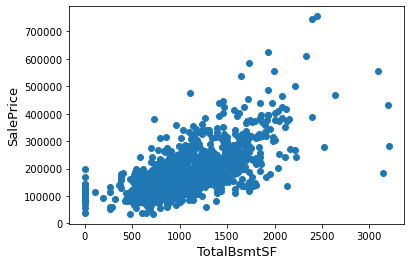

In [122]:
# Delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 5000) & (df_train['SalePrice'] < 300000)].index)

df_train = df_train.reset_index(drop=True)


fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

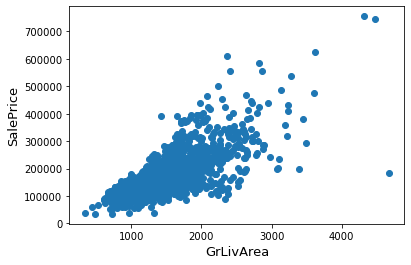

In [123]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

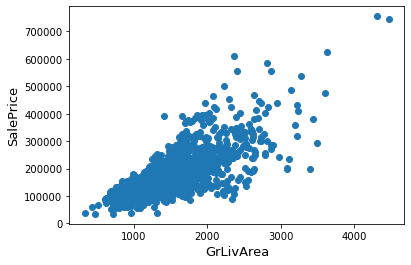

In [124]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)


fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [125]:
# missing data
total = df_train.isnull().sum()
percent = (df_train.isnull().sum()/df_train.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values(['Total'],ascending=False)
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageCond,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556


In [126]:
missing_data.head(5)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251


In [127]:
# drop 5 columns with the biggest ratio of null values

to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [128]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

LotFrontage     float64
MasVnrType       object
BsmtFinType1     object
Electrical       object
BsmtFinType2     object
BsmtCond         object
BsmtExposure     object
GarageType       object
MasVnrArea      float64
GarageCond       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
BsmtQual         object
dtype: object

## Number variable replacement

We will create a separate column to keep the information whether the value was missing. This way, we will have this information available in this column after we replace the value in the original one.

In [129]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

Fill missing values using mean, min, and 0

In [130]:
cols_with_missing

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [131]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

## Object (string) variable replacement

In [132]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [133]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

The information about Electrical and MasVnrType is missing in the documentation. Since we are dealing with categorical variables, we will create a new category for a missing value.

In [134]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [135]:
df_train.isnull().sum().any()

False

## Variable Transformation

In [136]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

c:\Users\Kyle\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

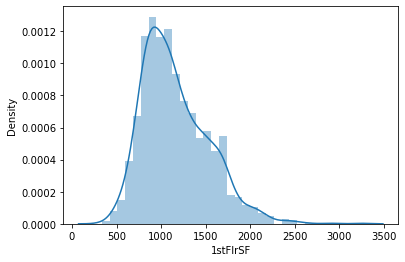

In [137]:
sns.distplot(df_train["1stFlrSF"])

c:\Users\Kyle\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Density'>

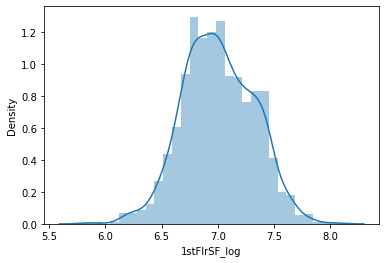

In [138]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.distplot(df_train["1stFlrSF_log"])

In [139]:
# Scaling
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))

In [140]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=42, step=1)


In [141]:
df_train_scaled.columns = num_feats+["1stFlrSF_log"]
print(df_train_scaled.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage_missing_ind',
       'MasVnrArea_missing_ind', 'GarageYrBlt_missing_ind', '1stFlrSF_log'],
      dtype='object')


In [142]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [143]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [144]:
df_dummy.columns.size

169